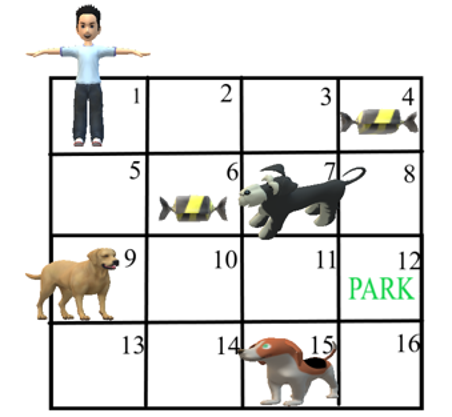

In [6]:
import pandas as pd
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt

#Open the park route map image
way_to_park_map  = Image.open("/Users...../parkgame.png") 
width, height = way_to_park_map.size 
way_to_park_map = way_to_park_map.resize((int(width/1.5), int(height/1.5)))
way_to_park_map

In [34]:
#For Reward and Q matrices the columns are in the order (U, D, L, R, N)
#Reward for blank cell 1, for staying in same cell 1, candy reward +5, dog obstacle -10, park +50, Invalid move 0,

Reward_matrix = np.array([[0, 1, 0, 1, 1],
                   [0, +5, 1, 1, 1],
                   [0, -10, 1, +5, 1],
                   [0, 1, 1, 0, +5],
                   [1, -10, 0, +5, 1],
                   [1, 1, 1, -10, +5],
                   [1, 1, +5, 1, -10],
                   [+5, +50, -10, 0, 1],
                   [1, 1, 0, 1, -10],
                   [+5, 1, -10, 1, 1],
                   [-10, -10, 1, +50, 1],
                   [1, 1, 1, 0, +50],
                   [-10, 0, 0, 1, 1],
                   [1, 0, 1, -10, 1],
                   [1, 0, 1, 1, -10],
                   [+50, 0, -10, 0, 1]])

q_table = np.zeros((16,5))


#Transition_state_matrix:
#The transition_state_matrix lays out all the possible movements to another state given the current state. 
#The invalid move is represented by -1 and no movement (staying in the current state) is represnted by 
#the corresponding state number. The transition_state_matrix will be referred to for tracing out the path to 
#Park through the map.
transition_state_matrix = np.array([[-1, 4, -1, 1, 0],
                       [-1, 5, 0, 2, 1],
                       [-1, 6, 1, 3, 2],
                       [-1, 7, 2, -1, 3],
                       [0, 8, -1, 5, 4],
                       [1, 9, 4, 6, 5],
                       [2, 10, 5, 7, 6],
                       [3, 11, 6, -1, 7],
                       [4, 12, -1, 9, 8],
                       [5, 13, 8, 10, 9],
                       [6, 14, 11, 12, 10],
                       [7, 15, 10, -1, 11],
                       [8, -1, -1, 13, 12],
                       [9, -1, 12, 14, 13],
                       [10, -1, 13, 15, 14],
                       [11, -1, 14, -1, 15]
                        ])

#Initialize the action
#0-up, 1-down, 2-left, 3-right, 4-No action
Action_matrix = np.array([[1, 3, 4],
                   [1, 2, 3, 4],
                   [1, 2, 3, 4],
                   [1, 2, 4],
                   [0, 1, 3, 4],
                   [0, 1, 2, 3, 4],
                   [0, 1, 2, 3, 4],
                   [0, 1, 2, 4],
                   [0, 1, 3, 4],
                   [0, 1, 2, 3, 4],
                   [0, 1, 2, 3, 4],
                   [0, 1, 2, 4],
                   [0, 3, 4],
                   [0, 2, 3, 4],
                   [0, 2, 3, 4],
                   [0, 2, 4]])

for i in range(400):
    #Start with the first most state
    learning_rate = 0.8
    start = 0
    current_state = start
    
    #move forward untill reach final state(park)
    while current_state != 12:
        
        #Randomly select one among all possible actions for the current state
        action = random.choice(Action_matrix[current_state])
        #print(action)
        #print('\n')
        
        #Move to the next state as a result of the previous action 
        next_state = transition_state_matrix[current_state][action]
        #print(next_state)
        future_reward = []
        
        #Add all the current reward value for all possible actions
        for action_next in Action_matrix[next_state]:
            future_reward.append(q_table[next_state][action_next])
        
        #For all possible actions from the next state, select the one with highest Q value
        q_state = Reward_matrix[current_state][action] + learning_rate*max(future_reward)
        
        #Update the Q table with new reward value
        q_table[current_state][action] = q_state
        
        #Set the next state as the current state in order to move forward
        current_state = next_state

q_df = pd.DataFrame(q_table)

#Print out the optimal path referring to the final Q-table and Transition matrices
Path = []
state = 0
while state != 11:
    Path.append(state+1)
    row = q_df.iloc[state]
    direction = row.idxmax(axis=1)
    state = transition_state_matrix[state][direction]
Path.append(state+1)

#This gives the Path avoiding all obstacles as well as yielding higher rewards
print(Path)

[1, 2, 3, 4, 8, 12]


<ipython-input-34-34a72d9636ad>:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  action_table = np.array([[1, 3, 4],


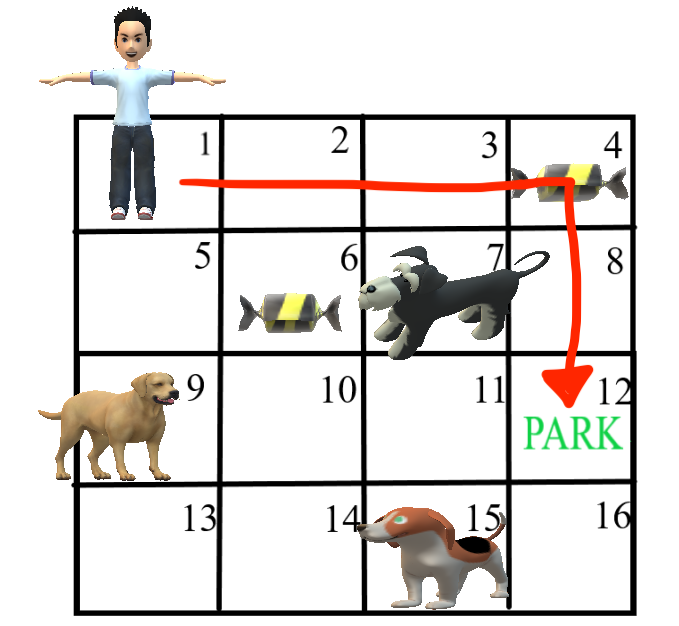

In [36]:
Final_route = Image.open("/User...../parkgameresult.png") 
Final_route